# Cleaning & Wrangling Data

In [541]:
# Import datasets 

import pandas as  pd
from google.colab import files

humanFreedomURL = 'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv'
humanFreedomDF = pd.read_csv(humanFreedomURL)
humanFreedomDF.head()
humanFreedomDF.shape

(1620, 120)

In [542]:
# Military Spend Data Source: https://data.worldbank.org/indicator/MS.MIL.XPND.GD.ZS
# Military spend is a percentage of GDP 

militarySpendDF = pd.read_csv('/content/milnew.csv', encoding="ISO-8859–1")
militarySpendDF.shape
militarySpendDF.head()

,Country Name,2015,2016,2017,2018,2019
0,Afghanistan,0.994576,0.956772,0.945227,1.006746,1.173908
1,Angola,3.105426,2.733341,2.421113,1.806941,1.644661
2,Albania,1.162304,1.103581,1.108696,1.168063,1.272559
3,Andorra,NaN,NaN,NaN,NaN,NaN
4,Arab World,7.422178,6.151733,6.467372,6.062372,5.435427


**Making `humanFreedomDF` usable:**

In [543]:
# Picking out relevant columns, removing rows with no info (-)...

columnsNew = ['year',
 'countries',
 'region',
 'hf_score',
 'hf_rank',
 'hf_quartile',
 'pf_score',
 'pf_rank',
 'ef_score']

humanFreedomDF = humanFreedomDF[columnsNew]
humanFreedomDF.tail(1000)


humanFreedomDF = humanFreedomDF[~humanFreedomDF.hf_score.str.contains("-")]
humanFreedomDF.shape

(1540, 9)

In [544]:
# Renaming columns, type converting...


hfClean = humanFreedomDF.rename(columns={'countries': 'Country','hf_score': 'hfScore', 'hf_rank': 'hfRank',
                                                'hf_quartile': 'hfQuartile', 'pf_score': 'pfScore',
                                                'pf_rank': 'pfRank', 'ef_score': 'efScore'})


hfClean['Country'] = hfClean['Country'].astype(str)
hfClean['region'] = hfClean['region'].astype(str)
hfClean['hfScore'] = hfClean['hfScore'].astype(float)
hfClean['hfRank'] = hfClean['hfRank'].astype(int)
hfClean['hfQuartile'] = hfClean['hfQuartile'].astype(int)
hfClean['pfScore'] = hfClean['pfScore'].astype(float)
hfClean['pfRank'] = hfClean['pfRank'].astype(int)
hfClean['efScore'] = hfClean['efScore'].astype(float)


hfClean.dtypes


year            int64
Country        object
region         object
hfScore       float64
hfRank          int64
hfQuartile      int64
pfScore       float64
pfRank          int64
efScore       float64
dtype: object

In [545]:
hfClean.tail(50)

,year,Country,region,hfScore,hfRank,hfQuartile,pfScore,pfRank,efScore
1570,2008,Peru,Latin America & the Caribbean,7.46,50,2,7.36,70,7.56
1571,2008,Georgia,Caucasus & Central Asia,7.48,49,2,7.40,68,7.55
1572,2008,Panama,Latin America & the Caribbean,7.53,48,2,7.73,54,7.34
1573,2008,North Macedonia,Eastern Europe,7.55,47,2,8.17,45,6.94
1574,2008,Montenegro,Eastern Europe,7.67,46,2,8.12,46,7.21
1575,2008,Albania,Eastern Europe,7.68,45,2,8.07,49,7.28
1576,2008,Greece,Eastern Europe,7.77,44,2,8.52,37,7.01
1577,2008,Bulgaria,Eastern Europe,7.78,43,2,8.32,40,7.23
1578,2008,Taiwan,East Asia,7.79,42,2,8.09,47,7.49
1579,2008,Costa Rica,Latin America & the Caribbean,7.81,41,2,8.28,42,7.34


In [546]:
# Selecting ex-USSR countries for year 2017...

ussr = ['Russia', 'Ukraine', 'Georgia', 'Belarus', 'Uzbekistan', 'Armenia', 'Azerbaijan', 
        'Kazakhstan', 'Kyrgyz Republic', 'Moldova', 'Turkmenistan', 'Tajikstan', 'Latvia', 'Lithuania',
         'Estonia']

ussrDF = hfClean[hfClean.Country.str.contains('|'.join(ussr))]
ussrDF.head(50)
ussrDF = ussrDF.reset_index(drop=True)




ussr2017 = ussrDF[ussrDF['year'] == 2017]

wanted = ['Country', 'hfScore', 'hfRank', 'hfQuartile']
HF2017 = ussr2017[wanted].copy()
HF2017
# Manually adding in values for Kazakhstan, Turkmenistan, Tajikstan...

HF2017 = HF2017.reset_index(drop=True)
# HF2017.loc[13] = ['Turkmenistan', 6.90, 73] not included in HF research + uzb *
HF2017.loc[13] = ['Tajikistan', 6.05, 138, 4] 
HF2017.loc[6] = ['Kyrgyzstan', 6.90 , 67, 2] 

HF2017

,Country,hfScore,hfRank,hfQuartile
0,Armenia,7.42,54,2
1,Azerbaijan,6.22,121,3
2,Belarus,6.65,92,3
3,Estonia,8.46,15,1
4,Georgia,7.74,41,1
5,Kazakhstan,6.90,73,2
6,Kyrgyzstan,6.90,67,2
7,Latvia,8.29,23,1
8,Lithuania,8.32,22,1
9,Moldova,6.93,71,2


**Making `militarySpendDF` usable:**

In [547]:
# Select relevant columns and rename...

militarySpendDF.head()

wanted = ['Country Name', '2015',	'2017']
MSClean = militarySpendDF[wanted].copy()
MSClean.columns = ['Country', '2015', '2017']
MSClean

,Country,2015,2017
0,Afghanistan,0.994576,0.945227
1,Angola,3.105426,2.421113
2,Albania,1.162304,1.108696
3,Andorra,NaN,NaN
4,Arab World,7.422178,6.467372
...,...,...,...
258,Kosovo,0.776154,0.795724
259,"Yemen, Rep.",NaN,NaN
260,South Africa,1.099182,1.043302
261,Zambia,1.753234,1.309596


In [548]:
# Select post-USSR countries

ussr = ['Russia', 'Ukraine', 'Georgia', 'Belarus', 'Uzbekistan', 'Armenia', 'Azerbaijan', 
        'Kazakhstan', 'Kyrgyz Republic', 'Moldova', 'Turkmenistan', 'Tajik', 'Latvia', 'Lithuania',
         'Estonia']
  
msUSSR = MSClean[MSClean.Country.str.contains('|'.join(ussr))]
msUSSR = msUSSR.reset_index(drop=True)
msUSSR.head(50)

,Country,2015,2017
0,Armenia,4.239226,3.849731
1,Azerbaijan,5.464877,3.821456
2,Belarus,1.281840,1.156380
3,Estonia,2.011335,2.014652
4,Georgia,2.140413,2.062536
5,Kazakhstan,1.109721,0.870507
6,Kyrgyz Republic,1.752024,1.604803
7,Lithuania,1.135067,1.715539
8,Latvia,1.048095,1.590645
9,Moldova,0.353941,0.323119


In [549]:
# Removing Turkmenistan, Uzbekistan due to empty data...

msUSSR.dtypes
msUSSR = msUSSR[msUSSR['2015'].notna()]
msUSSR

,Country,2015,2017
0,Armenia,4.239226,3.849731
1,Azerbaijan,5.464877,3.821456
2,Belarus,1.281840,1.156380
3,Estonia,2.011335,2.014652
4,Georgia,2.140413,2.062536
5,Kazakhstan,1.109721,0.870507
6,Kyrgyz Republic,1.752024,1.604803
7,Lithuania,1.135067,1.715539
8,Latvia,1.048095,1.590645
9,Moldova,0.353941,0.323119


In [550]:
# Cleaning up names and data to match HF2017...

msUSSR.loc[11] = ['Tajikistan', 	1.219381, 	1.219381] 
msUSSR.loc[6] = ['Kyrgyzstan', 	1.752024, 1.604803] 
msUSSR.loc[10] = ['Russia', 4.862758, 4.233407] 

msUSSR

,Country,2015,2017
0,Armenia,4.239226,3.849731
1,Azerbaijan,5.464877,3.821456
2,Belarus,1.281840,1.156380
3,Estonia,2.011335,2.014652
4,Georgia,2.140413,2.062536
5,Kazakhstan,1.109721,0.870507
6,Kyrgyzstan,1.752024,1.604803
7,Lithuania,1.135067,1.715539
8,Latvia,1.048095,1.590645
9,Moldova,0.353941,0.323119


In [551]:
# Final form of MS dataframe...

want = ['Country', '2017']
MS2017 = msUSSR[want].copy()

MS2017.columns = ['Country', 'Spend']
MS2017

,Country,Spend
0,Armenia,3.849731
1,Azerbaijan,3.821456
2,Belarus,1.156380
3,Estonia,2.014652
4,Georgia,2.062536
5,Kazakhstan,0.870507
6,Kyrgyzstan,1.604803
7,Lithuania,1.715539
8,Latvia,1.590645
9,Moldova,0.323119


In [552]:
# Final form of HF dataframe... 

HF2017 = HF2017.reset_index(drop=True)
HF2017

,Country,hfScore,hfRank,hfQuartile
0,Armenia,7.42,54,2
1,Azerbaijan,6.22,121,3
2,Belarus,6.65,92,3
3,Estonia,8.46,15,1
4,Georgia,7.74,41,1
5,Kazakhstan,6.90,73,2
6,Kyrgyzstan,6.90,67,2
7,Latvia,8.29,23,1
8,Lithuania,8.32,22,1
9,Moldova,6.93,71,2


In [553]:
# Merge on country... 

merged = pd.merge(MS2017, HF2017, how='inner', on='Country')
merged

,Country,Spend,hfScore,hfRank,hfQuartile
0,Armenia,3.849731,7.42,54,2
1,Azerbaijan,3.821456,6.22,121,3
2,Belarus,1.156380,6.65,92,3
3,Estonia,2.014652,8.46,15,1
4,Georgia,2.062536,7.74,41,1
5,Kazakhstan,0.870507,6.90,73,2
6,Kyrgyzstan,1.604803,6.90,67,2
7,Lithuania,1.715539,8.32,22,1
8,Latvia,1.590645,8.29,23,1
9,Moldova,0.323119,6.93,71,2


In [554]:
merged.describe()

,Spend,hfScore,hfRank,hfQuartile
count,13.000000,13.000000,13.000000,13.000000
mean,2.103581,7.113846,73.000000,2.153846
std,1.231109,0.853186,41.317873,0.987096
min,0.323119,6.050000,15.000000,1.000000
25%,1.219381,6.340000,41.000000,1.000000
50%,1.715539,6.900000,71.000000,2.000000
75%,2.884402,7.740000,114.000000,3.000000
max,4.233407,8.460000,138.000000,4.000000


Both datasets have been cleaned and merged into one usable dataframe. 

 `merged` will now be used to create two visualizations, 1) to see if there is a correlation between human freedom index and military spend levels, and 2) to map the former USSR countries on a quadrant of high-low military spend vs high-low human freedom index.  

# Visualizations

In [557]:
# Import libraries... 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Subract mean of each column to find scaled values
merged['news'] = merged['Spend'] - 2.103581
merged['newhf'] = merged['hfScore'] - 7.113846


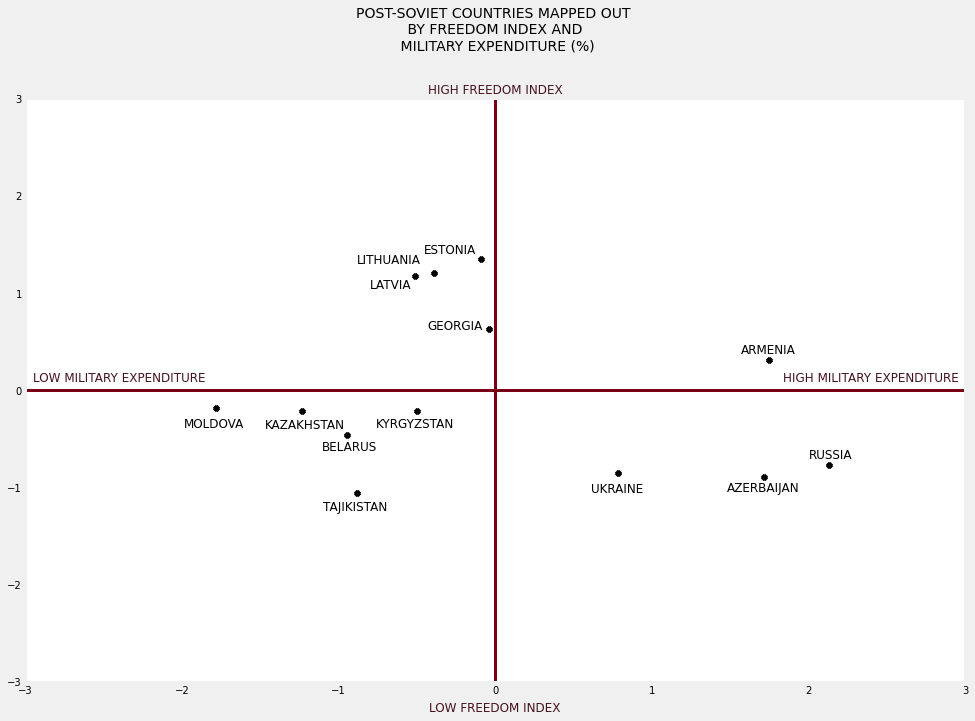

In [566]:
# Plot quadrant...

ax =  merged.plot.scatter('news', 'newhf', figsize=(15,10), marker='x', color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.axhline(y=0, color='#780116', linestyle='-', linewidth=3)
plt.axvline(x=0, color='#780116', linestyle='-', linewidth=3)

ax.grid(False)


# Label points... 

plt.text(1.566150, 0.38,'ARMENIA',  fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(1.477875	, -1.039846,'AZERBAIJAN', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-1.107201	, -0.62046,'BELARUS', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-0.458929	, 1.406154,'ESTONIA', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-0.435045	, 0.626154,'GEORGIA', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-1.470074, -0.393846,'KAZAKHSTAN', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-0.76, -0.383846,'KYRGYZSTAN', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-0.8842, 1.306154,'LITHUANIA', fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-0.802936, 1.05,'LATVIA',  fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-1.990462, -0.37846,'MOLDOVA',  fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(2, -0.7	,'RUSSIA',  fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(-1.101, -1.233846,'TAJIKISTAN',  fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))
plt.text(0.61, -1.05 ,'UKRAINE',  fontsize='12', bbox=dict(facecolor='#FDBA18', alpha=0))


# Spectrum labels...

plt.text(0, 3.05, 'HIGH FREEDOM INDEX', color='#461220', fontsize='12',
        bbox={'alpha': 0, 'pad': 10}, horizontalalignment='center')

plt.text(0, -3.3, 'LOW FREEDOM INDEX', color='#461220', fontsize='12',
        bbox={'alpha': 0, 'pad': 10}, horizontalalignment='center')

plt.text(-2.4, 0.09, 'LOW MILITARY EXPENDITURE', color='#461220',  fontsize='12', 
        bbox={'alpha': 0, 'pad': 10}, horizontalalignment='center')

plt.text(2.4, 0.09, 'HIGH MILITARY EXPENDITURE', color='#461220', fontsize='12',
        bbox={'alpha': 0, 'pad': 10}, horizontalalignment='center')


plt.text(0, 3.5, 'POST-SOVIET COUNTRIES MAPPED OUT \n BY FREEDOM INDEX AND \n MILITARY EXPENDITURE (%)',
        bbox={'alpha': 0, 'pad': 0}, horizontalalignment='center')


# Aesthetics and sizing... 

plt.axis('on')

x_axis = ax.xaxis
x_axis.set_label_text('re')
x_axis.label.set_visible(False)

y_axis = ax.yaxis
y_axis.set_label_text('ert')
y_axis.label.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

In [540]:
# Making df for just 1st and 4th quadrant countries (low military expenditure)

wanted = ['Estonia', 'Lithuania', 'Latvia', 'Georgia', 'Kyrgyzstan', 'Belarus', 'Kazakhstan', 'Moldova', 'Tajikistan']
scatterquad = merged[merged.Country.str.contains('|'.join(wanted))]


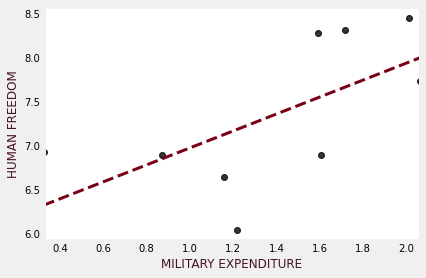

In [539]:
# Correlation line between low military spend countries... 

import seaborn as sns

ax = sns.regplot(x = "Spend", y = "hfScore", data=scatterquad, ci=None, 
                 color='black', line_kws={'linewidth':3, 'linestyle':'--', 
                                          'color':'#780116'})

ax.grid(False)

plt.xlabel('MILITARY EXPENDITURE', color='#461220', fontsize='12')
plt.ylabel('HUMAN FREEDOM', color='#461220', fontsize='12')

ax.tick_params(axis='both', which='major', labelsize=10)